## 데이터 시각화 실전 문제 풀이

In [1]:
train = read.csv("C:/data/ad_tracking/train_sample.csv")

In [2]:
names(train)
table(train$is_attributed);

[1] "ip"              "app"             "device"          "os"             
[5] "channel"         "click_time"      "attributed_time" "is_attributed"


    0     1 
99773   227 

In [3]:
library(dplyr)
library(ggplot2)
library(data.table)
library(caret)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'data.table' was built under R version 3.4.4"
Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

Loading required package: lattice


### 실습 과제1-1

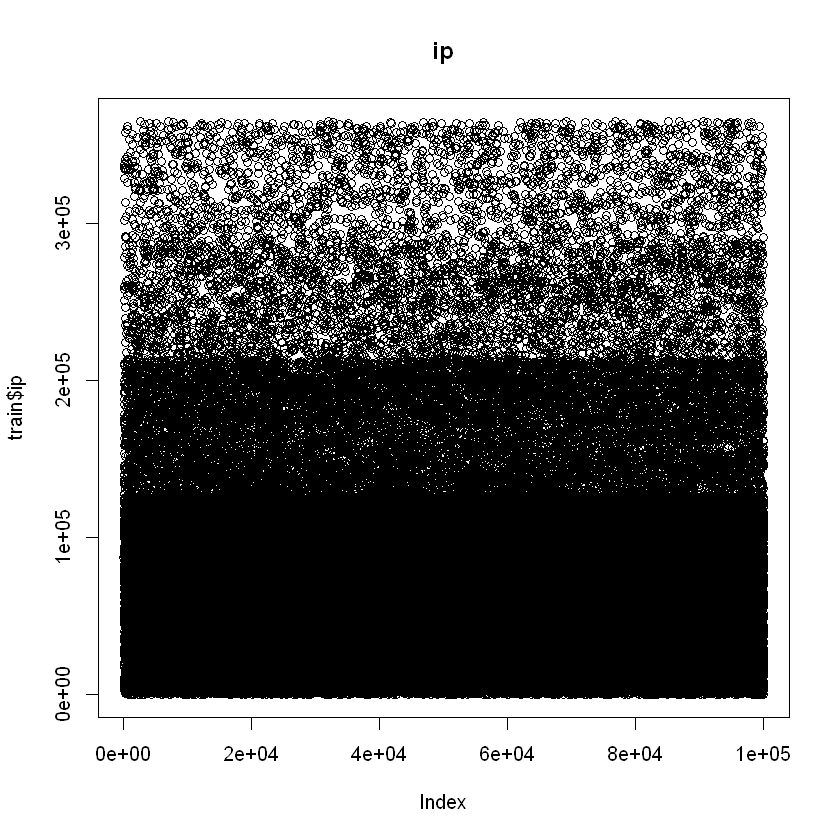

In [5]:
plot(train$ip, main="ip")

<pre>
위의 plot으로 그래프를 작성한 것을 좀 더 ggplot을 이용하여 시각화를 수행해보자.

(1) ip 에 대해 아래와 같이 점 그래프를 작성해 보자.
(2) 색은 is_attribute로 구분되어 진다.
(3) alpha = 0.1로 지정했다. 점의 크기는 0.05이다.
(4) x축의 축이름은 : index로 지정했다.
</pre>

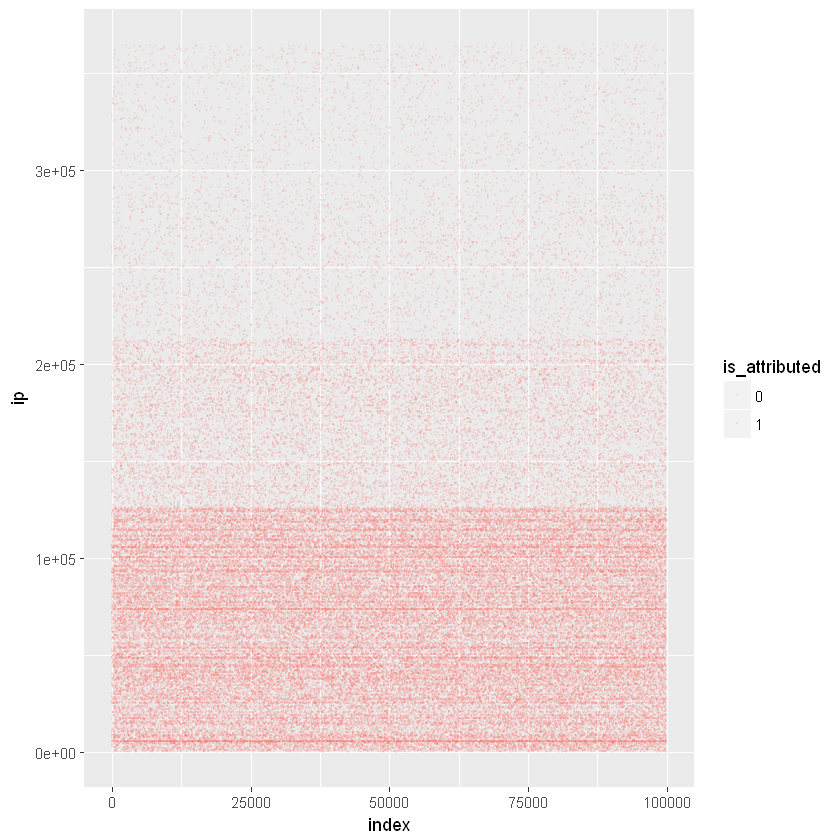

In [6]:
ggplot(train, aes(x = seq_along(ip), y = ip)) +
  geom_point(aes(col=factor(is_attributed)), alpha=0.1, size=0.05) +
  scale_x_continuous(name="index") +
  guides(col=guide_legend("is_attributed"))

### 실습 과제1-2
<pre>
아래 그래프는 app, os, channel, device에 대한 내용을 시각화 해 보았다. 

그래프의 생성된 조건은 
(1) 범례가 있을 것,
(2) X축의 레이블의 값이 index로 변경하였다.
(3) theme를 이용하여 레이블의 값을 45로 기울게 하였고, 중앙 정렬하였다.
</pre>

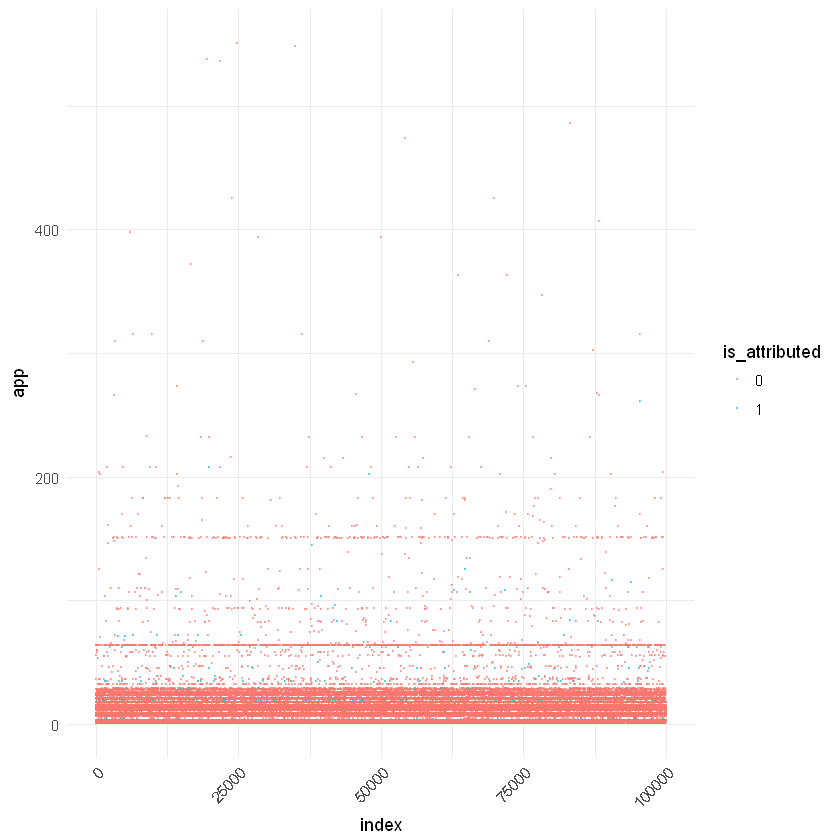

In [4]:
pi1 <- ggplot(train, aes(x = seq_along(app), y = app)) +
  geom_point(aes(col=factor(is_attributed)), alpha=0.5, size=0.2) +
  theme_minimal() +
  scale_y_continuous() + 
  scale_x_continuous(name="index") +
  guides(col=guide_legend("is_attributed")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
pi1

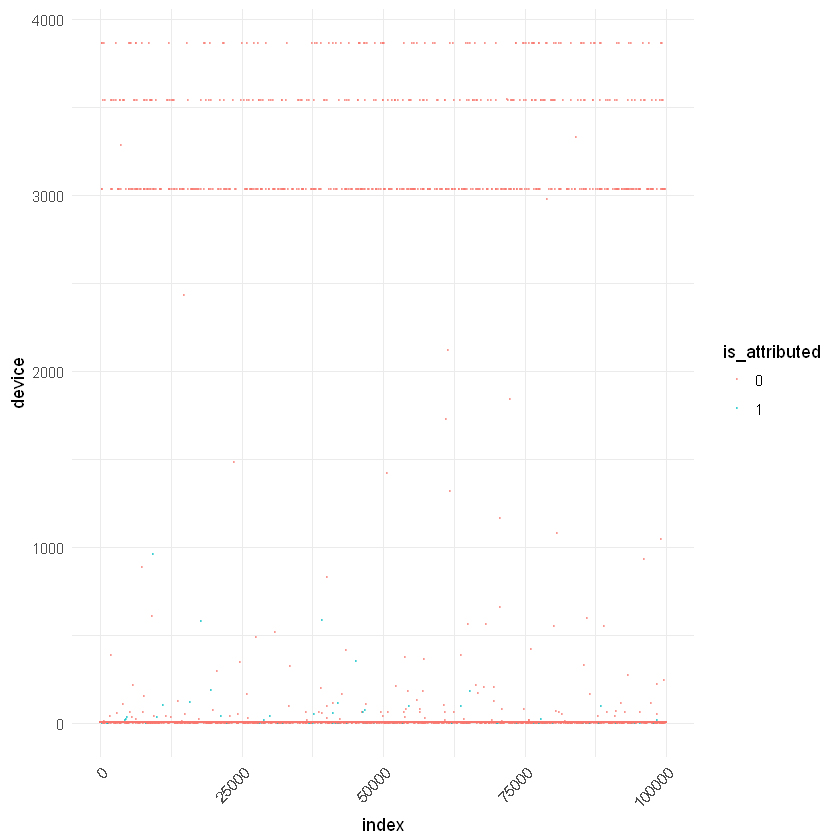

In [5]:
pi2 <- ggplot(train, aes(x = seq_along(device), y = device)) +
  geom_point(aes(col=factor(is_attributed)), alpha=0.5, size=0.2) +
  theme_minimal() +
  scale_y_continuous() + 
  scale_x_continuous(name="index") +
  guides(col=guide_legend("is_attributed")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
pi2

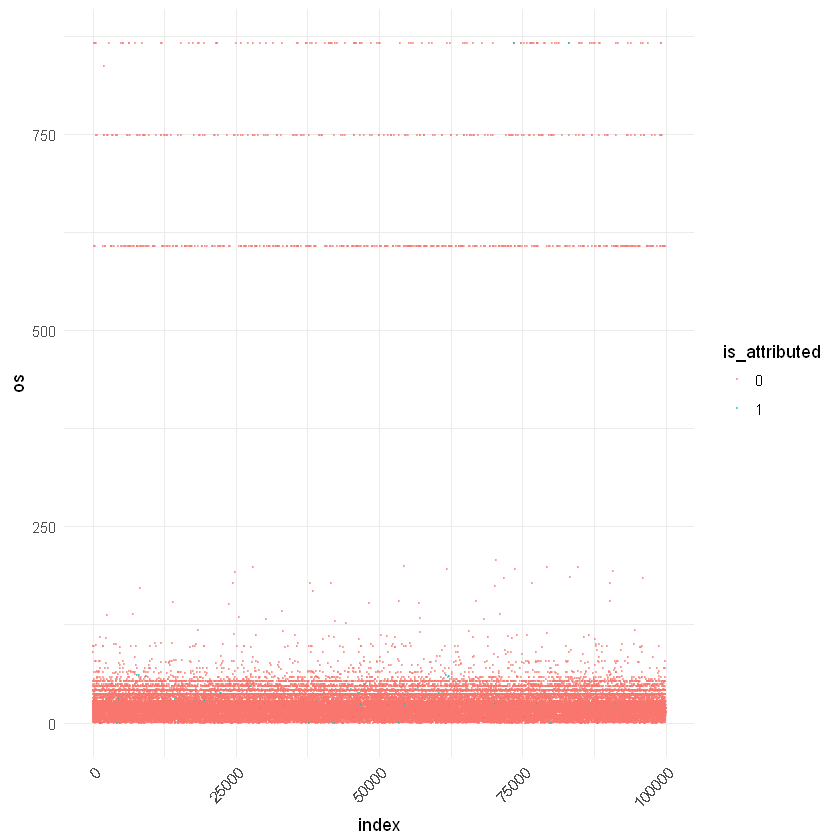

In [9]:
pi3 <- ggplot(train, aes(x = seq_along(os), y = os)) +
  geom_point(aes(col=factor(is_attributed)), alpha=0.5, size=0.2) +
  theme_minimal() +
  scale_y_continuous() + 
  scale_x_continuous(name="index") +
  guides(col=guide_legend("is_attributed")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
pi3

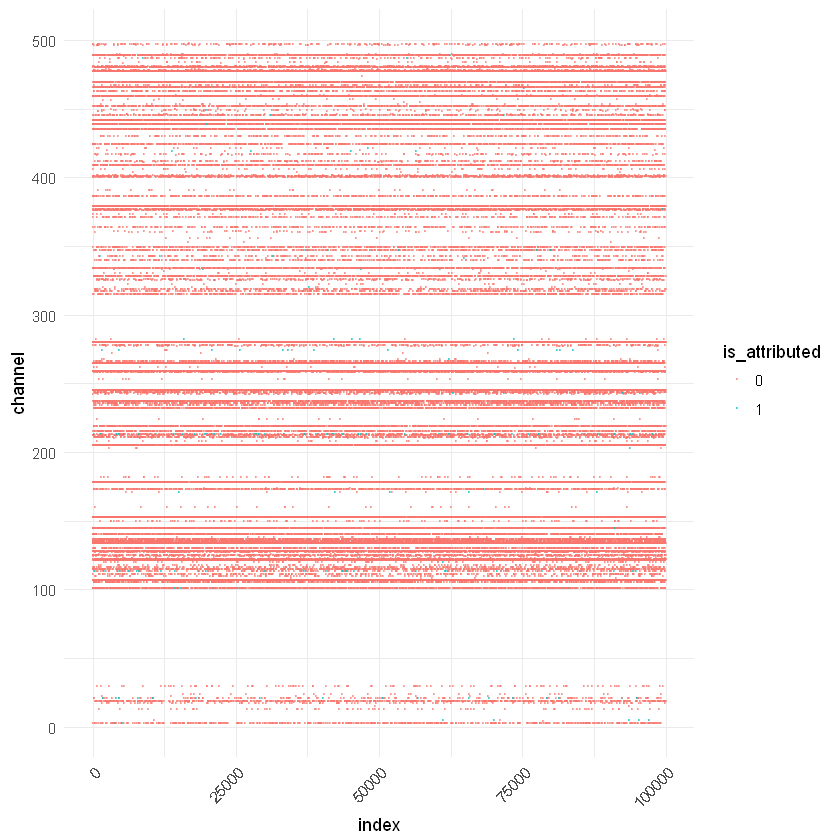

In [10]:
pi4 <- ggplot(train, aes(x = seq_along(channel), y = channel)) +
  geom_point(aes(col=factor(is_attributed)), alpha=0.5, size=0.2) +
  theme_minimal() +
  scale_y_continuous() + 
  scale_x_continuous(name="index") +
  guides(col=guide_legend("is_attributed")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
pi4

### 실습 과제1-3
위의 내용을 한 그래프에 표시할 수 없을까?
     

In [6]:
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.4.4"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



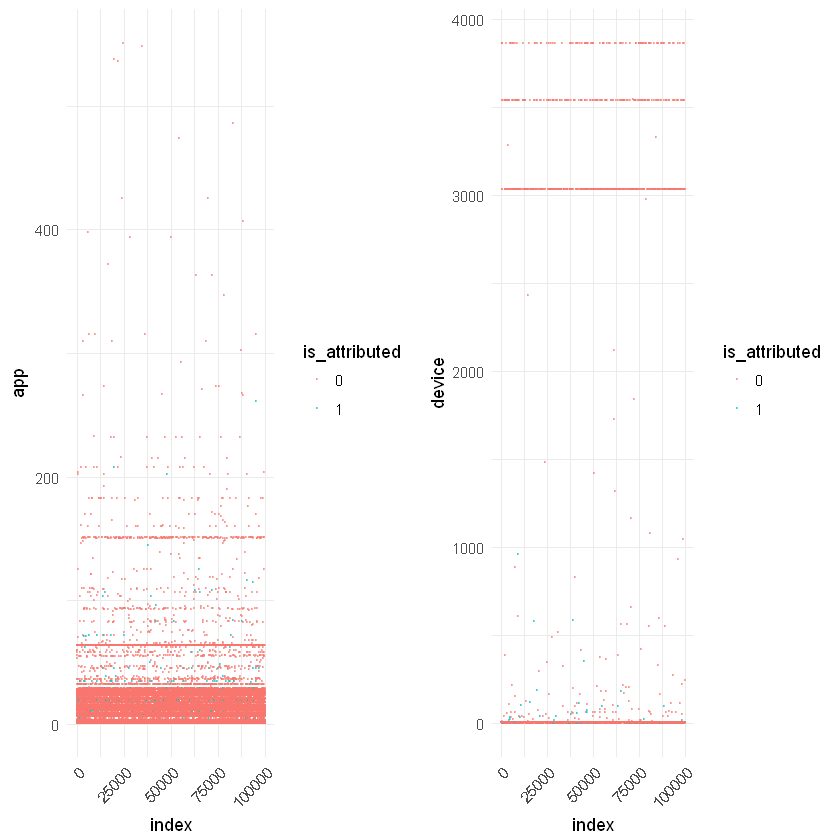

In [7]:
grid.arrange(pi1, pi2, ncol=2)

### 실습과제 2. 훈련 데이터 나누기

<pre>
우리는 5만개의 새로운 adTracking 훈련용 샘플 데이터를 확보했다.
이 데이터는 is_attributed 변수가 4만개, 1만개의 데이터를 각각 가지고 있다.
이중에 모델을 만들기 위해 1만개의 데이터 셋을 가지는 샘플을 만들어보자.

is_attributed  각각 7000(0), 3000(1) 이다. (sampling::strata) 함수 이용
</pre>

In [21]:
library(sampling)

tr2 = read.csv("C:/data/ad_tracking/tr_5m_st4_1.csv")
names(tr2)
table(tr2$is_attributed)

[1] "X"               "ip"              "app"             "device"         
[5] "os"              "channel"         "click_time"      "attributed_time"
[9] "is_attributed"


    0     1 
40000 10000 

### 비복원 추출이용

In [19]:
set.seed(0)
idx <- strata(c("is_attributed"), size = c(7000, 3000), method = "srswor", data = tr2)
trainS <- getdata(tr2, idx)
trS1 = trainS[,c(2,3,4,5,6,7,8)]
names(trS1); dim(trS1)


[1] "ip"              "app"             "device"          "os"             
[5] "channel"         "click_time"      "attributed_time"

[1] 10000     7

In [20]:
write.csv(trS1, "C:/data/ad_tracking/tr_1m.csv", row.names=F)
list.files("C:/data/ad_tracking/")

[1] "dfDat0413.RDS"             "img"                      
 [3] "img1.png"                  "sample_submission.csv"    
 [5] "sample_submission.csv.zip" "sub_10m.csv"              
 [7] "test.csv"                  "test.csv.zip"             
 [9] "test_10m.csv"              "testDat0413.RDS"          
[11] "tr_1m.csv"                 "tr_5m_st4_1.csv"          
[13] "train.csv"                 "train.csv.zip"            
[15] "train_sample.csv"          "train_sample.csv.zip"     
[17] "trainp1.csv"               "X_testmod_0414.RDS"